In [186]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = 'wastebase'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
full_df   = pd.concat(df_list, ignore_index=True)

full_df.head()

,product_barcode,product_label,product_size,brand_name,manufacturer_country,manufacturer_name,scan_country,data_url,bottle_weight,bottle_count
0,0,Purified drinking water,500ml,Rehaan ice,KE,Al Hatim Traders,KE,https://wastebase.org/#/o/f434a282-c578-461d-b...,NaN,11
1,415668,Extra Virgin Olive Oil,1.0 L,Sainsbury's,UK,UNKNOWN_ORG,GB,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1
2,643764,Still Mountain Water from Scotland,500 ml,M&S Food,UK,UNKNOWN_ORG,GB,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1
3,76280045314,Calcium and Magnesium,1.600ml,Solaray Dietary supplement,UK,UNKNOWN_ORG,TZ,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1
4,8080150059,Fiery Pink Pepper Body Lotion,300 ml,Molton Brown,UK,UNKNOWN_ORG,GB,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1


In [188]:
total_found = round(full_df['bottle_count'].sum())
print('Total Found:', total_found)


Total Found: 2230285


In [190]:
canada = full_df.loc[full_df['scan_country'] == 'CA']
canada.head()

,product_barcode,product_label,product_size,brand_name,manufacturer_country,manufacturer_name,scan_country,data_url,bottle_weight,bottle_count
1177,55577421024,G Cool Blue,710 ml,Gatorade,US,"Pepsico, Inc",CA,https://wastebase.org/#/o/fa6fbb15-8b61-4e1d-8...,NaN,1
1178,57271164108,G Zero,591 ml,Gatorade,US,"Pepsico, Inc",CA,https://wastebase.org/#/o/fa6fbb15-8b61-4e1d-8...,NaN,1
1180,64480006013,Spring Water,500 ml,big8,CA,Empire Company Limited,CA,https://wastebase.org/#/o/5fcf39bd-870f-4cee-b...,NaN,4
1181,65400000968,Lemon Lime,710 ml,7UP,US,Keurig Dr Pepper Inc.,CA,https://wastebase.org/#/o/08d08755-55fa-4b19-a...,NaN,1
1182,67000104022,Original Taste,710 ml,Coca-Cola,US,Coca-Cola,CA,https://wastebase.org/#/o/c3710738-2999-4396-a...,NaN,1


In [192]:
df = pd.DataFrame().assign(brand=canada['brand_name'], country=canada['manufacturer_country'], parent=canada['manufacturer_name'], bottle_count=canada['bottle_count'])
df.head()

,brand,country,parent,bottle_count
1177,Gatorade,US,"Pepsico, Inc",1
1178,Gatorade,US,"Pepsico, Inc",1
1180,big8,CA,Empire Company Limited,4
1181,7UP,US,Keurig Dr Pepper Inc.,1
1182,Coca-Cola,US,Coca-Cola,1


In [193]:
import matplotlib.pyplot as plt
brand_frequency = pd.DataFrame().assign(brand=sorted(df['brand'].unique()))

for i, brand in enumerate(brand_frequency['brand']):
    brand_df = df[df['brand'] == brand]
    brand_frequency.at[i, 'bottle_count'] = brand_df['bottle_count'].sum()

brand_frequency.sort_values('bottle_count', inplace=True, ascending=False)
brand_frequency.head()


,brand,bottle_count
44,big8,371.0
13,Gatorade,349.0
23,Nestlé,220.0
31,President's Choice,214.0
4,Coca-Cola,208.0


In [246]:
parent_frequency = pd.DataFrame().assign(parent=sorted(df['parent'].unique()))

for i, parent in enumerate(parent_frequency['parent']):
    brand_df = df[df['parent'] == parent]
    parent_frequency.at[i, 'bottle_count'] = brand_df['bottle_count'].sum()

parent_frequency.sort_values('bottle_count', inplace=True, ascending=False)
parent_frequency.head()

,parent,bottle_count
18,"Pepsico, Inc",666.0
4,Coca-Cola,403.0
9,Empire Company Limited,371.0
14,Nestlé S.A.,321.0
13,Loblaw Companies Ltd,214.0


<AxesSubplot:title={'center':'Bottle Count by Manufacturer'}, xlabel='parent'>

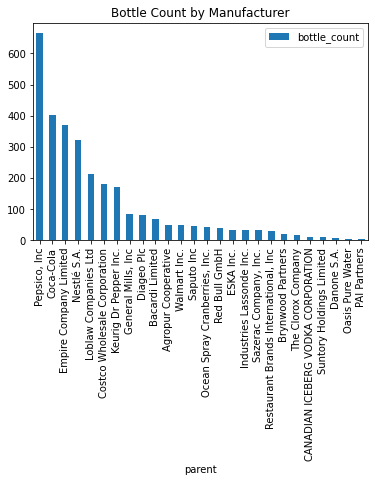

In [307]:
parent_frequency.plot.bar(x='parent', y='bottle_count', title="Bottle Count by Manufacturer")


In [239]:
local_count = 0
global_count = 0
usa_count = 0

for country in df['country'].unique():
    country_df = df[df['country'] == country]
    if country != 'CA':
       global_count += country_df['bottle_count'].sum()
    if country == 'US':
        usa_count = country_df['bottle_count'].sum()
    elif country == 'CA':
        local_count = country_df['bottle_count'].sum()

print(f'Made in Canada: {local_count}\nMade in USA: {usa_count}\nForeign Total: {global_count}\n')

total_count = df['bottle_count'].sum()

percent_locally_made = round((local_count / total_count) * 100)
print(f'Locally Made: {percent_locally_made}%')

percent_usa_made = round((usa_count / total_count) * 100)
print(f'Made in the USA: {percent_usa_made}%')



Made in Canada: 738
Made in USA: 1659
Foreign Total: 2233

Locally Made: 25%
Made in the USA: 56%


In [303]:
country_df = df.groupby(df['country']).aggregate({'brand': pd.Series.unique, 'parent': pd.Series.unique, 'bottle_count': 'sum'})
country_df

,brand,parent,bottle_count
country,,,
AE,[Oasis],[Oasis Pure Water],4
AT,[Red Bull],[Red Bull GmbH],38
BM,[Bacardi],[Bacardi Limited],68
CA,"[big8, President's Choice, Tim Horton's, Oasis...","[Empire Company Limited, Loblaw Companies Ltd,...",738
CH,"[Pure Life, Nestlé, Nestea]",[Nestlé S.A.],321
FR,"[Tropicana, Evian]","[PAI Partners, Danone S.A.]",7
GB,[Smirnoff],[Diageo Plc],82
JP,[Orangina],[Suntory Holdings Limited],10
MZ,[Scotsburn],[Saputo Inc],44


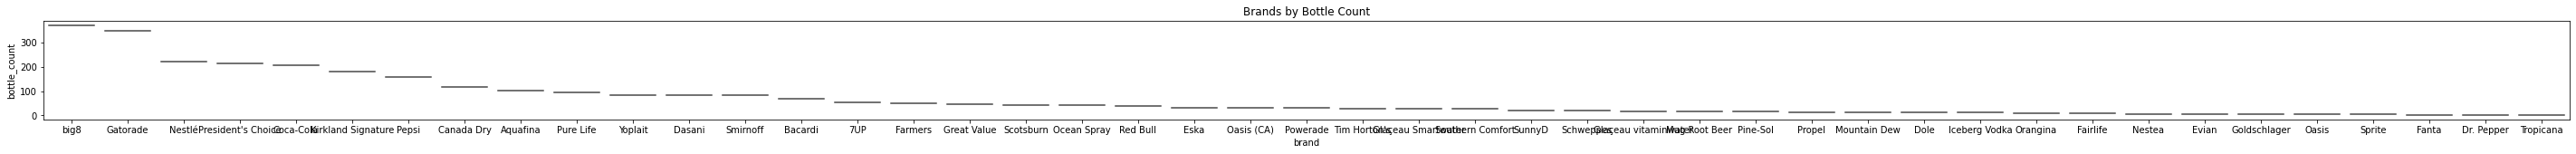

In [195]:
import seaborn as sns

plt.figure(figsize=(50,2))
plt.title("Brands by Bottle Count")
sns.violinplot(data=brand_frequency, x='brand', y='bottle_count')
plt.show()

## Plastic Waste in Canada

In the sample of 2,971 bottles found:

  - 25% of collected plastic was made locally
  - 56% was manufactured in the USA
  
  The most common to find manufacturers
  1. Pepsico, Inc
  2. Coca-Cola
  3. Empire Company Limited
  4. Nestlé S.A.
  5. Loblaw Companies Ltd

  The most common to find brands
  1. Big8
  2. Gaterade
  3. Nestlé
  4. Presidents Choice
  5. Coca-Cola